In [3]:
import json
from search_clustering.pipeline import Pipeline
from search_clustering.client import *
from search_clustering.preprocessing import *
from search_clustering.embedding import *
from search_clustering.clustering import *
from search_clustering.labeling import *

In [4]:
try:
    es = ElasticClient()

    for index in es.client.indices.get_alias():
        print(index)

    results = es.search(index="plos_intros", field="introduction", query="virus")

    with open("results_virus.json", "w") as json_file:
        json.dump(results, json_file)

except:
    with open("results_virus.json", "r") as json_file:
        results = json.load(json_file)

print(f"{len(results)} results")
snippets = [res["snippet"] for res in results]

84 results


virus, 12, antibodies, known
water, diameter, proposed, binding, characterized, competence, potent, For, regulate, found, correctly, virus, one, 4, inactivated, men, 1, people, efficacy
virus, resistance, CA1, terrestrial, Human, virus-specific, HS, RNA, response


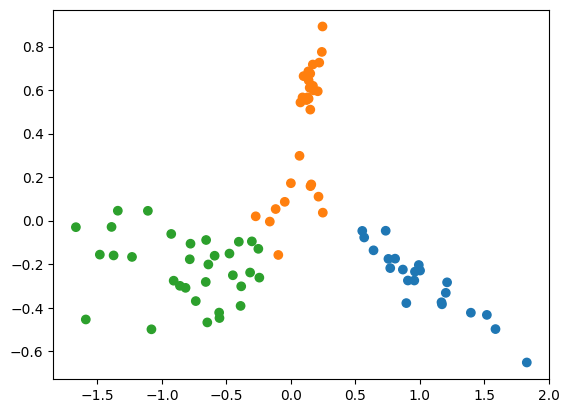

In [5]:
pipe = Pipeline(StopWordRemoval(), Snippet2Vec(), KMeansClustering("silhouette"), LDA())
vecs, clusters = pipe.run(results, visualize=True)

/home/chris/miniconda3/envs/elastic/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/chris/miniconda3/envs/elastic/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/chris/miniconda3/envs/elastic/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.

virus, hepatitis, positively, 7
antibodies, VLPs, common, HIV, virus, DCL4, 12, MHV-68, spread, VZV, 1, public, delineated, changed
organisms, 8, virus, virus-specific
previously, virus, 45–49, IFN, RNA, leukocyte, million
globally, infection, enrolled, Streptococcus, Human, many, 2000, tomato, Nile, virus, vector, non-dividing, inactivated, H5N1, VMMC, interactions, O-glycosylated, integrations, Foamy


/home/chris/miniconda3/envs/elastic/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


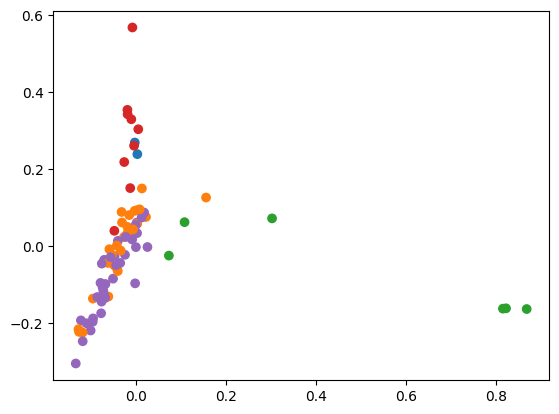

In [8]:
pipe = Pipeline(StopWordRemoval(), Nefidf(), KMeansClustering("silhouette"), LDA())
vecs, clusters = pipe.run(results, visualize=True)